In [2]:
use_widgets=True;
def importessentiallibs(use_widgets):
    import numpy as np
    import matplotlib as mpl
    if(use_widgets==True):
        %matplotlib widget 
    else :
        %matplotlib inline
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt 
    return np, mpl, plt
    

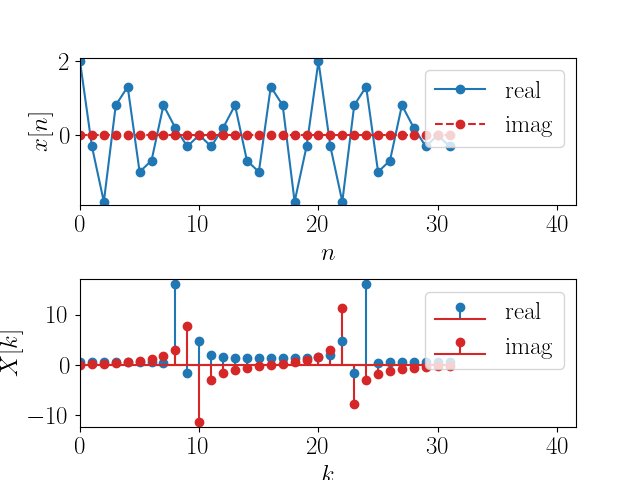

In [6]:
np,mpl,plt=importessentiallibs(use_widgets);
def dft(x):
    N=len(x);
    n=np.arange(N);
    X=np.zeros(N,dtype=complex);
    wn=np.exp(-2j*np.pi/N*n);
    for k in range(N):
        X[k]=np.sum(x*(wn**k));
    return X;

def plot_function_plus_spectre(x,X):
    n = np.arange(len(x))
    fig, ax = plt.subplots(2,1)
    plt.subplots_adjust(hspace=0.5)

    ax[0].plot(n, x.real, 'o-', label = 'real', color = 'tab:blue')
    ax[0].plot(n, x.imag, 'o--', label = 'imag', color = 'tab:red')
    
    ax[0].set_ylabel('$x[n]$')
    ax[0].set_ylim(np.min([x.real, x.imag])-0.1, np.max([x.real, x.imag])+0.1)
    ax[0].set_xlabel('$n$')
    ax[0].set_xlim(0, N*1.3)

    ax[0].legend(loc="upper right");
    
    k = n
    ax[1].stem(k, X.real, label = 'real')
    markerline, stemlines, baseline = ax[1].stem(k, X.imag, label = 'imag')
    plt.setp(markerline, markerfacecolor = 'tab:red', markeredgecolor = 'tab:red')
    plt.setp(stemlines, color = 'tab:red')

    ax[1].set_ylabel('$X[k]$')
    ax[1].set_ylim(np.min([X.real, X.imag])-1, np.max([X.real, X.imag])+1)
    ax[1].set_xlabel('$k$')
    ax[1].set_xlim(0, N*1.3)

    ax[1].legend(loc="upper right");  
    
N=32;
n=np.arange(N);
Phi1=np.pi/3;
Phi2=np.pi/3;

F1=3/10;
F2=6/8;
x = np.cos(2*np.pi*F1*n)+np.cos(2*np.pi*F2*n);
X=dft(x);
plot_function_plus_spectre(x,X);


    

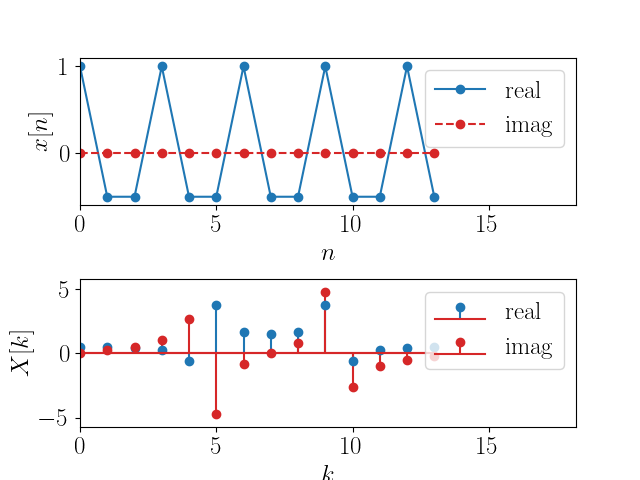

In [7]:
import scipy.fft as  fft
N=14
n=np.arange(N);
F1=3/9;
x = np.cos(2*np.pi*F1*n)
X=fft.fft(x);
plot_function_plus_spectre(x,X);





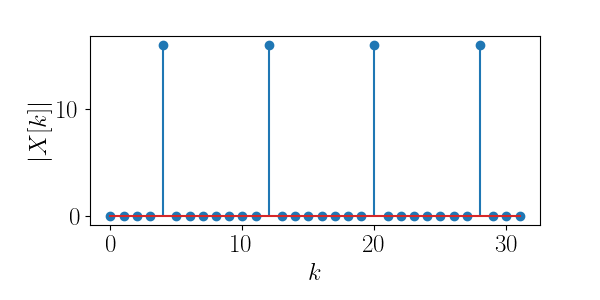

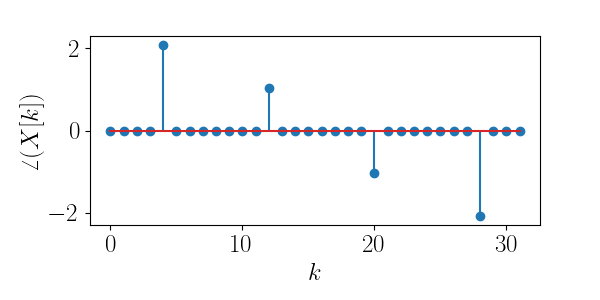

In [8]:
n = np.arange(32)
# relativne ucestanosti
F1 = 1/8
F2 = 3/8
#pocetne faze
Phi1 = 2*np.pi/3 # np.pi/3, 2*np.pi/3 
Phi2 = np.pi/3

x = np.cos(2*np.pi*F1*n + Phi1) + np.cos(2*np.pi*F2*n + Phi2)


fig = plt.figure(figsize = [6, 3])
X = fft.fft(x);
Xp=np.angle(X)
Xp=Xp*(np.abs(X)>1e-13)
plt.stem(np.abs(X));
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$k$')
plt.ylabel(r'$|X[k]|$');


fig = plt.figure(figsize = [6, 3])
plt.stem(n,Xp);
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$k$')
plt.ylabel(r'$\angle(X[k])$');

([<matplotlib.axis.XTick at 0x7ff4c14d1970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

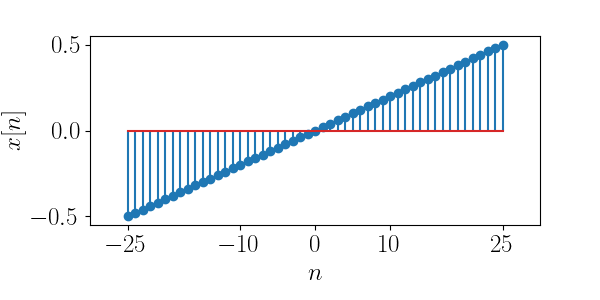

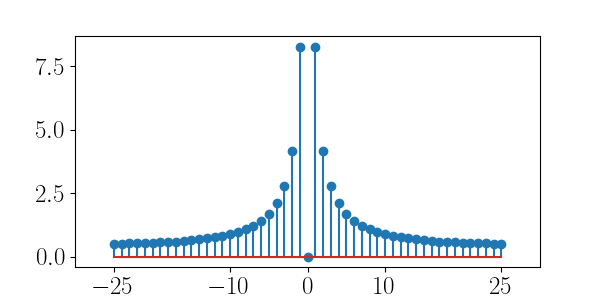

In [9]:
np,mpl,plt=importessentiallibs(use_widgets)
x=np.arange(0,1.02,0.02)-0.5;
k=np.arange(0,len(x))-len(x)//2;
fig=plt.figure(figsize=[6,3])
plt.stem(k,x)
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.xlim(-30,30)
plt.xticks([-25, -10 , 0, 10, 25])
plt.subplots_adjust(bottom=0.25, left=0.15)
fig=plt.figure(figsize=[6,3])
X=fft.fft(x)
X=fft.fftshift(X)
plt.stem(k,abs(X))
plt.xlim(-30,30)
plt.xticks([-25, -10 , 0, 10, 25])

#plt.subplots_adjust(bottom=0.25, left=0.15)

([<matplotlib.axis.XTick at 0x7ff4c143f670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

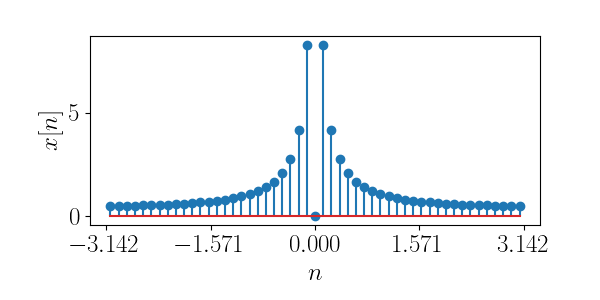

In [10]:
N=len(x)
Wk=2*np.pi*k/N;
fig=plt.figure(figsize=[6,3])
plt.stem(Wk,abs(X))
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

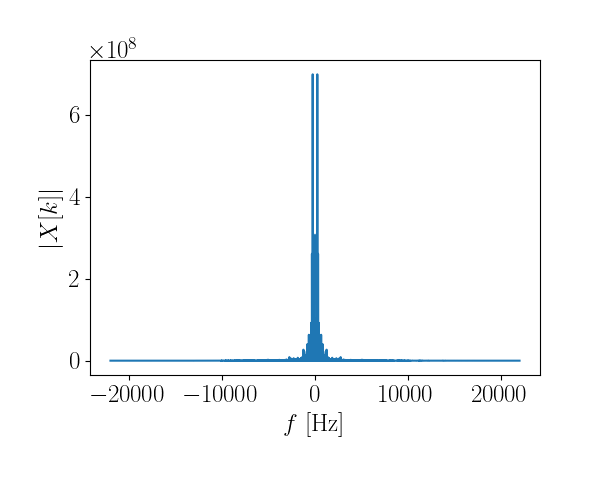

In [11]:
np,mpl,plt=importessentiallibs(use_widgets);
import scipy.fft as fft

import IPython
from scipy.io import wavfile

fs, x = wavfile.read("audio/01_guitar_E2.wav")
IPython.display.display(IPython.display.Audio(x, rate = 1*fs))

N=len(x);
k=np.arange(N)- N//2
f=fs*k/N;
X=fft.fft(x);
fig=plt.figure(figsize=[6,5])
plt.plot(f,abs(fft.fftshift(X)))
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$|X[k]|$');



In [12]:
import ipywidgets as widgets
import scipy.fft as fft

import IPython
from scipy.io import wavfile

def plotImageAndSpectre(filename):
    fs,x=wavfile.read("audio/"+filename);
    IPython.display.display(IPython.display.Audio(x, rate = fs))
    N=len(x);
    X=fft.fft(x);
    if "guitar" in filename:
        fmax=2000;
    else:
        fmax=10000;
    ###Nmax = fmax*N//fs
    #f = fs*np.arange(Nmax)/N
    f=fs*np.arange(N)/N;
    f=f[:fmax]
    X = X[:len(f)];
   # print(N)
    # only part of the spectra
    #X = X[:len(f)];
    ##X=X[:4000];
    fig=plt.figure(figsize=[6,5])
    plt.plot(f,abs(X))
    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$f$ [Hz]')
    plt.ylabel(r'$|X[k]|$');
    plt.show()

widgets.interact(plotImageAndSpectre, filename=[    "01_guitar_E2.wav",  
                                                     "02_guitar_A2.wav", 
                                                     "03_guitar_D3.wav", 
                                                     "04_guitar_G3.wav",
                                                     "05_guitar_H3.wav",
                                                     "06_guitar_E4.wav",
                                                     "07_clarinet_A.wav",
                                                     "08_violin_H.wav"]);


interactive(children=(Dropdown(description='filename', options=('01_guitar_E2.wav', '02_guitar_A2.wav', '03_gu…

50
50


([<matplotlib.axis.XTick at 0x7ff4bb3ec550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

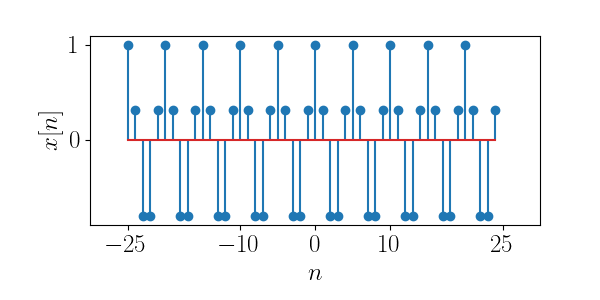

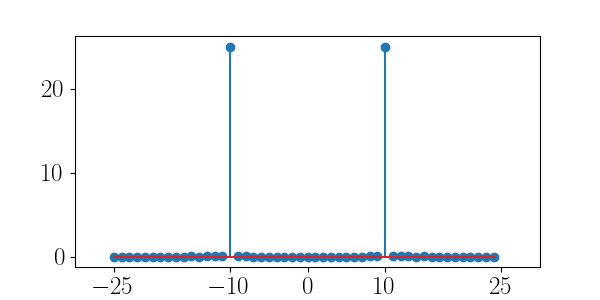

In [17]:
np,mpl,plt=importessentiallibs(use_widgets)
#x=np.arange(0,1.02,0.02)-0.5;
F=1/5
N=50
k=np.arange(0,N)-N//2;
x=np.cos(2*np.pi*F*k)
fig=plt.figure(figsize=[6,3])
plt.stem(k,x)
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.xlim(-30,30)
plt.xticks([-25, -10 , 0, 10, 25])
plt.subplots_adjust(bottom=0.25, left=0.15)
fig=plt.figure(figsize=[6,3])
X=fft.fft(x)
print(len(X))
X=fft.fftshift(X)
print(len(X))
plt.stem(k,abs(X))
plt.xlim(-30,30)
plt.xticks([-25, -10 , 0, 10, 25])

#plt.subplots_adjust(bottom=0.25, left=0.15)

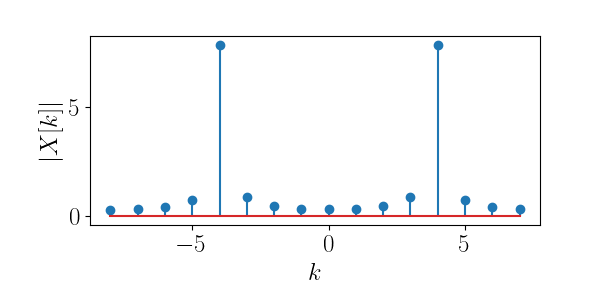

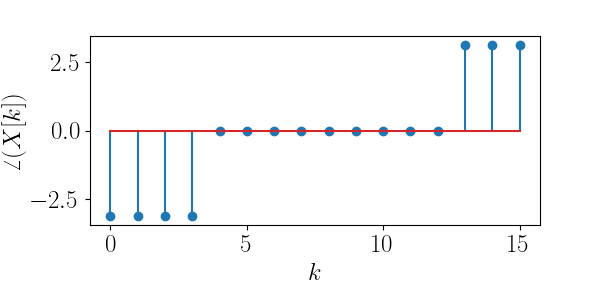

In [82]:
np, mpl, plt = importessentiallibs(use_widgets)

import scipy.fft as fft

N = 16

n = np.arange(N)-N//2
# relativne ucestanosti
F = 3.9/N  
#pocetne faze
Phi = 0 # np.pi/3, 2*np.pi/3 

#x = np.exp(1j*(2*np.pi*F*n + Phi))
x=np.cos(2*np.pi*F*n)
X = fft.fft(x)
X=fft.fftshift(X)

fig = plt.figure(figsize = [6, 3])
plt.stem(n,abs(X));
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$k$')
plt.ylabel(r'$|X[k]|$');

fig = plt.figure(figsize = [6, 3])
X = fft.fft(x);
plt.stem(np.angle(X));
plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$k$')
plt.ylabel(r'$\angle(X[k])$');

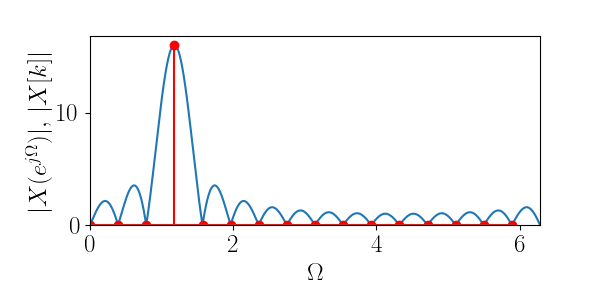

In [3]:
np, mpl, plt = importessentiallibs(use_widgets)
from scipy.fft import fft, ifft
def fourierTransform(x, N):
    # Ova funkcija izračunava Furijeovu transformaciju u N ekvidistantnih tačaka
    if len(x) < N:
        x = np.append(x, np.zeros(N - len(x)))

    X = np.zeros(N, dtype = 'complex')
    n = np.arange(N)
    for k in range(N):
        Omega_k = 2*np.pi/N*k
        X[k] = np.sum(x*np.exp(-1j*Omega_k*n))
    
    return X

N = 16
n = np.arange(N)
# relativne ucestanosti
F = 3/N  
#pocetne faze
Phi = 0 # np.pi/3, 2*np.pi/3 

#x = np.exp(1j*(2*np.pi*F*n + Phi))
x = np.exp(1j*(2*np.pi*F*n + Phi))
NFT = 1024;
#X = fourierTransform(x, NFT)
X=fft(x,NFT)
Omega = (np.arange(NFT)/NFT)*2*np.pi

Xk = X[::NFT//N]
Omega_k = Omega[::NFT//N]

fig = plt.figure(figsize = [6, 3])
plt.plot(Omega, abs(X))
plt.stem(Omega_k, abs(Xk), 'r', markerfmt='ro')

plt.subplots_adjust(bottom=0.25, left=0.15)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
plt.xlim([0, 2*np.pi])
plt.ylim([0, max(abs(X))*1.05]);


interactive(children=(FloatSlider(value=0.0, description='F0', max=1.0, step=0.01), IntSlider(value=30, descri…

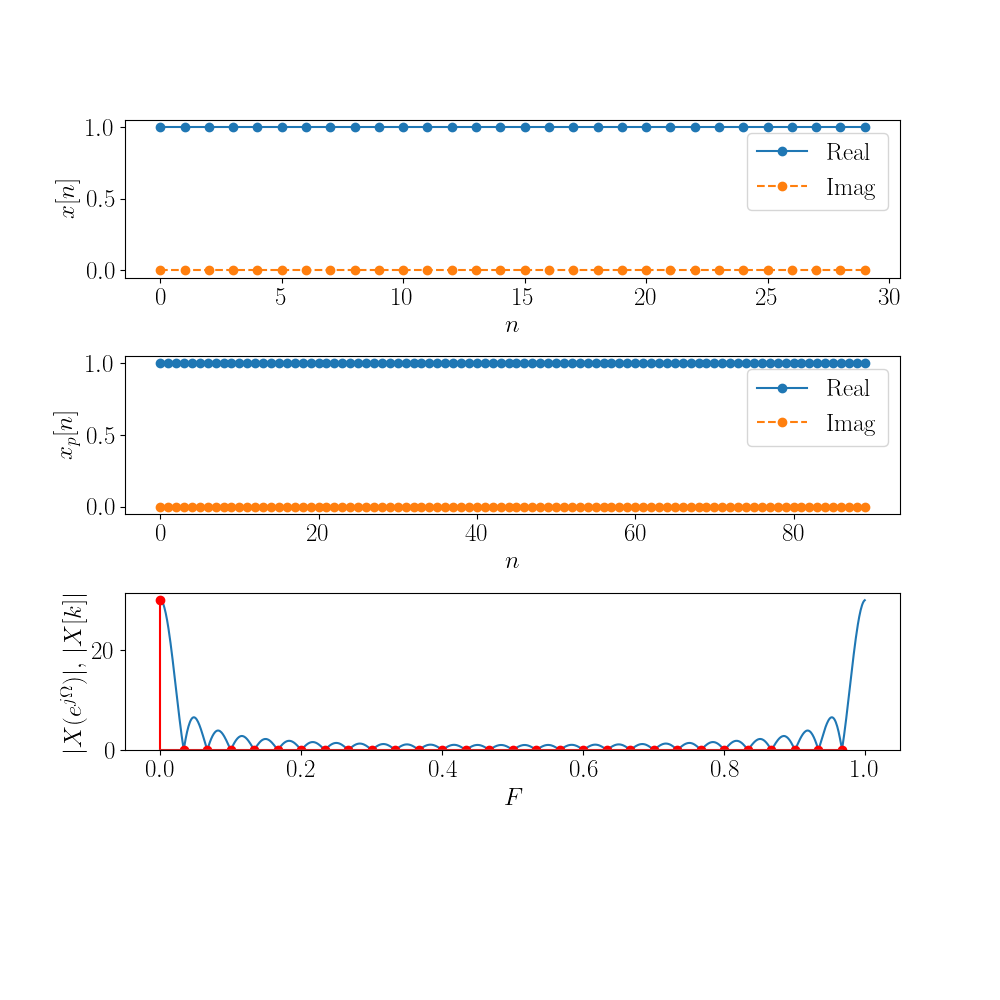

In [84]:


import ipywidgets as widgets
import scipy.fft as fft

fig, axs = plt.subplots(3, 1, figsize = [10, 10])
plt.subplots_adjust(bottom=0.25, hspace = 0.5)

def plotFTandDFT(F0, N):
    
    n = np.arange(N)
    x = np.exp(1j*(2*np.pi*F0*n))

    NFT = 1024;
    X = fourierTransform(x, NFT)
    Omega = (np.arange(NFT)/NFT)*2*np.pi
    F = Omega/2/np.pi
    
    Xk = fft.fft(x)
    Omega_k = (np.arange(N)/N)*2*np.pi
    F_k = Omega_k/2/np.pi
    print(f'k is: {F0*N}')
    
    #Clear figures 
    axs[0].cla()    
    axs[1].cla() 
    axs[2].cla() 
    
    # Plot signal x
    ax = axs[0]
    
    ax.plot(x.real, 'o-', label='Real')
    ax.plot(x.imag, 'o--', label = 'Imag')
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$x[n]$')
    ax.legend(loc = 'upper right')
    
    # Plot periodic expansion
    xp = np.append(x, x)
    xp = np.append(xp, x)
    
    ax = axs[1]
    ax.plot(xp.real, 'o-', label='Real')
    ax.plot(xp.imag, 'o--', label = 'Imag')
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$x_p[n]$')
    ax.legend(loc = 'upper right')
    
    # Plot spectra
    ax = axs[2]
    ax.plot(F, abs(X))
    ax.stem(F_k, abs(Xk), 'r', markerfmt='ro')

    ax.set_xlabel(r'$F$')
    ax.set_ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    #ax.set_xlim([0, 1])
    ax.set_ylim([0, max(abs(X))*1.05]);
   

widgets.interact(plotFTandDFT, F0 = (0, 1, 0.01),  N = (10, 51, 5));